In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# load the data
data = np.loadtxt('ECGU.txt')

# look at the data
print(data)
print(data.shape)

[[-275. -119. -119.]
 [-275. -119. -119.]
 [-275. -118. -121.]
 ...
 [  -4.  -83.   21.]
 [  -9.  -88.   31.]
 [ -16.  -96.   33.]]
(6500, 3)


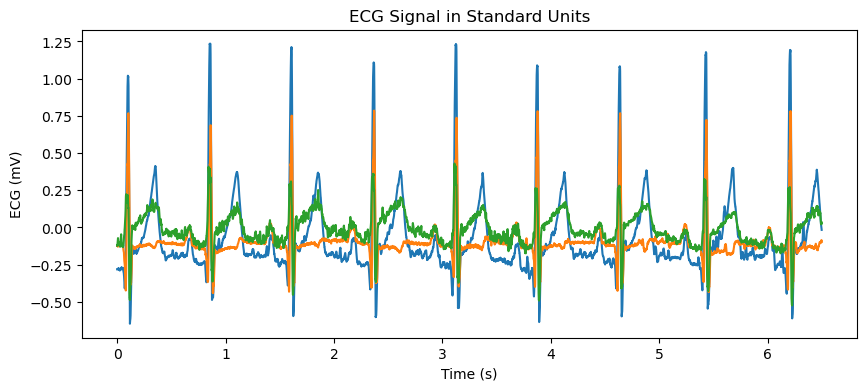

In [5]:
# load the data
data = np.loadtxt('ECGU.txt')

# Convert ECG raw data to millivolts (mV)
ecg_mV = data * 1024e-6  # 1024 µV = 1024e-6 V = 1.024 mV per unit

# Create time axis in seconds
num_samples = data.shape[0]
sampling_freq = 1000  # Hz
time = np.arange(num_samples) / sampling_freq

# Plot the ECG data
plt.figure(figsize=(10, 4))
plt.plot(time, ecg_mV)
plt.xlabel('Time (s)')
plt.ylabel('ECG (mV)')
plt.title('ECG Signal in Standard Units')
plt.show()

renamed Data.

Text(0.5, 1.0, 'ECG Signal in Standard Units')

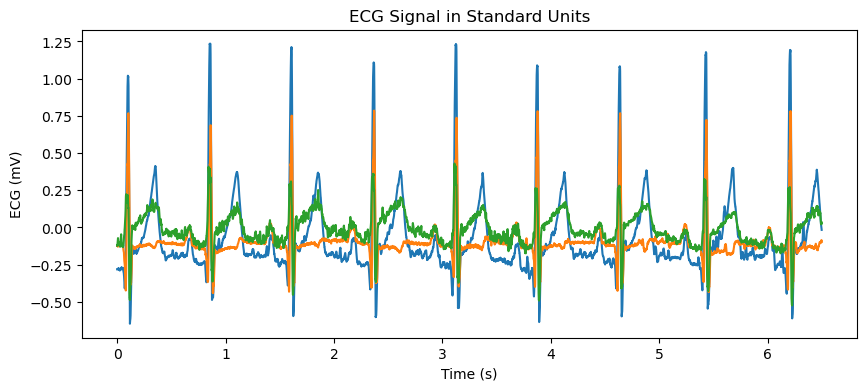

In [6]:
def load_and_convert_ecg(filename, gain_per_unit=1024e-6, sampling_frequency=1000):
    """
    Load ECG raw data from a text file, convert to millivolts, and create time axis in seconds.
    
    Parameters:
        filename (str): Path to the ECG data file.
        gain_per_unit (float): Conversion factor from raw units to volts (default: 1024 µV per unit).
        sampling_frequency (int): Sampling frequency in Hz (default: 1000 Hz).
    
    Returns:
        time_axis (np.ndarray): Time axis in seconds.
        ecg_millivolts (np.ndarray): ECG data in millivolts.
    """
    ecg_raw_data = np.loadtxt(filename)
    ecg_millivolts = ecg_raw_data * gain_per_unit
    num_samples = ecg_raw_data.shape[0]
    time_axis = np.arange(num_samples) / sampling_frequency
    return time_axis, ecg_millivolts

# Load and convert ECG data
time_axis, ecg_millivolts = load_and_convert_ecg('ECGU.txt')

# Plot the ECG data
plt.figure(figsize=(10, 4))
plt.plot(time_axis, ecg_millivolts)
plt.xlabel('Time (s)')
plt.ylabel('ECG (mV)')
plt.title('ECG Signal in Standard Units')

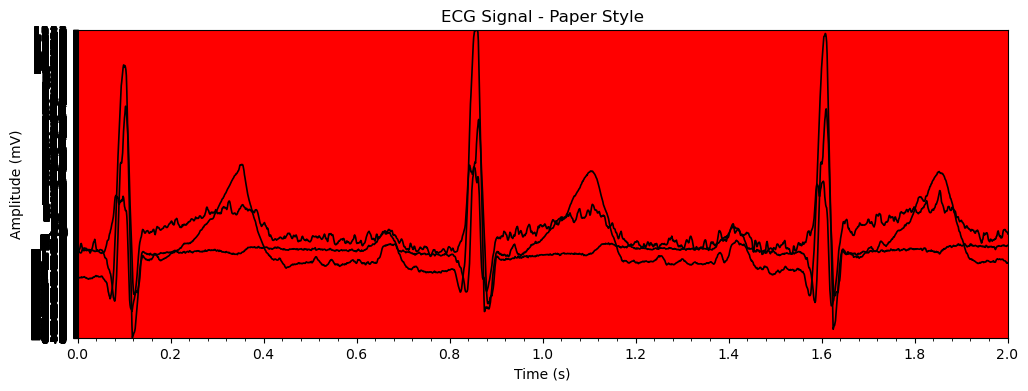

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def load_and_convert_ecg(filename, gain_per_unit=1024e-6, sampling_frequency=1000):
    """
    Load ECG raw data from a text file, convert to millivolts, and create time axis in seconds.
    """
    ecg_raw_data = np.loadtxt(filename)
    ecg_millivolts = ecg_raw_data * gain_per_unit * 1000  # convert to millivolts
    num_samples = ecg_raw_data.shape[0]
    time_axis = np.arange(num_samples) / sampling_frequency
    return time_axis, ecg_millivolts


# Load ECG data
time_axis, ecg_millivolts = load_and_convert_ecg("ECGU.txt")

# Plot ECG in paper style
plt.figure(figsize=(12, 4))
plt.plot(time_axis, ecg_millivolts, color="black", linewidth=1.2)

ax = plt.gca()
ax.set_facecolor("white")

# ECG paper grid
# Minor grid (1 mm)
ax.set_xticks(np.arange(0, time_axis[-1], 0.04), minor=True)
ax.set_yticks(np.arange(np.floor(np.min(ecg_millivolts))-0.1, 
                        np.ceil(np.max(ecg_millivolts))+0.1, 0.1), minor=True)
ax.grid(which="minor", color="red", linestyle=":", linewidth=0.5, alpha=0.4)

# Major grid (5 mm)
ax.set_xticks(np.arange(0, time_axis[-1], 0.2))
ax.set_yticks(np.arange(np.floor(np.min(ecg_millivolts))-0.5, 
                        np.ceil(np.max(ecg_millivolts))+0.5, 0.5))
ax.grid(which="major", color="red", linestyle="-", linewidth=0.8, alpha=0.7)

# Labels
plt.title("ECG Signal - Paper Style")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (mV)")

plt.xlim(time_axis[0], time_axis[min(len(time_axis)-1, 2000)])  # zoom first 2 seconds
plt.ylim(np.min(ecg_millivolts)-0.5, np.max(ecg_millivolts)+0.5)

plt.show()


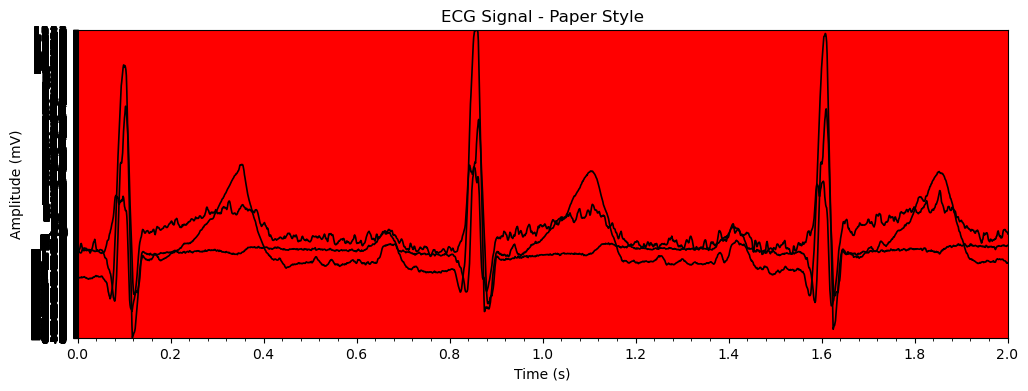

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def load_and_convert_ecg(filename, gain_per_unit=1024e-6, sampling_frequency=1000):
    """
    Load ECG raw data from a text file, convert to millivolts, and create time axis in seconds.
    """
    ecg_raw_data = np.loadtxt(filename)
    ecg_millivolts = ecg_raw_data * gain_per_unit * 1000  # convert to mV
    num_samples = ecg_raw_data.shape[0]
    time_axis = np.arange(num_samples) / sampling_frequency
    return time_axis, ecg_millivolts


# Load ECG
time_axis, ecg_millivolts = load_and_convert_ecg("ECGU.txt")

# Plot ECG
plt.figure(figsize=(12, 4))
plt.plot(time_axis, ecg_millivolts, color="black", linewidth=1.2)

ax = plt.gca()
ax.set_facecolor("white")  # White background

# Minor grid (small squares: 1 mm)
ax.set_xticks(np.arange(0, time_axis[-1], 0.04), minor=True)
ax.set_yticks(np.arange(np.floor(np.min(ecg_millivolts))-0.1, 
                        np.ceil(np.max(ecg_millivolts))+0.1, 0.1), minor=True)
ax.grid(which="minor", color="red", linestyle=":", linewidth=0.5, alpha=0.3)  # light, dotted lines

# Major grid (large squares: 5 mm)
ax.set_xticks(np.arange(0, time_axis[-1], 0.2))
ax.set_yticks(np.arange(np.floor(np.min(ecg_millivolts))-0.5, 
                        np.ceil(np.max(ecg_millivolts))+0.5, 0.5))
ax.grid(which="major", color="red", linestyle="-", linewidth=0.8, alpha=0.7)  # darker, solid lines

# Labels
plt.title("ECG Signal - Paper Style")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (mV)")

# Optional: zoom on first few seconds for clarity
plt.xlim(time_axis[0], time_axis[min(len(time_axis)-1, 2000)])
plt.ylim(np.min(ecg_millivolts)-0.5, np.max(ecg_millivolts)+0.5)

plt.show()


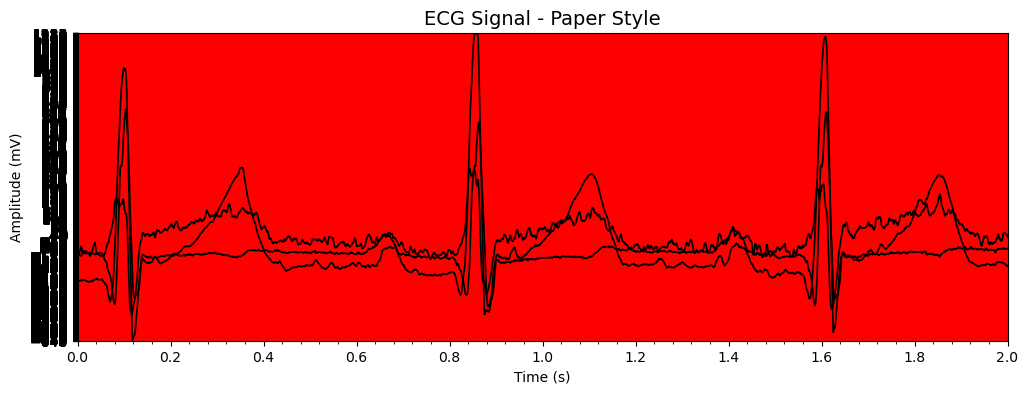

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def load_and_convert_ecg(filename, gain_per_unit=1024e-6, sampling_frequency=1000):
    """
    Load ECG raw data from a text file, convert to millivolts, and create time axis in seconds.
    """
    ecg_raw_data = np.loadtxt(filename)
    ecg_millivolts = ecg_raw_data * gain_per_unit * 1000  # convert to mV
    num_samples = ecg_raw_data.shape[0]
    time_axis = np.arange(num_samples) / sampling_frequency
    return time_axis, ecg_millivolts

# Load ECG
time_axis, ecg_millivolts = load_and_convert_ecg("ECGU.txt")

# Create figure
plt.figure(figsize=(12, 4))
plt.plot(time_axis, ecg_millivolts, color="black", linewidth=1.2)

ax = plt.gca()

# 1. Ensure white background
ax.set_facecolor("white")
plt.gcf().patch.set_facecolor('white')  # make figure background white too

# 2. Major grid (5 mm squares)
ax.set_xticks(np.arange(0, time_axis[-1]+0.2, 0.2))
ax.set_yticks(np.arange(np.floor(np.min(ecg_millivolts))-0.5, 
                        np.ceil(np.max(ecg_millivolts))+0.5, 0.5))
ax.grid(which="major", color="red", linestyle="-", linewidth=0.8, alpha=0.7)

# 3. Minor grid (1 mm squares) - use lighter alpha to avoid "solid red"
ax.set_xticks(np.arange(0, time_axis[-1]+0.04, 0.04), minor=True)
ax.set_yticks(np.arange(np.floor(np.min(ecg_millivolts))-0.1, 
                        np.ceil(np.max(ecg_millivolts))+0.1, 0.1), minor=True)
ax.grid(which="minor", color="red", linestyle=":", linewidth=0.5, alpha=0.2)

# 4. Labels and title
plt.title("ECG Signal - Paper Style", fontsize=14)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (mV)")

# 5. Optional: zoom on first few seconds
plt.xlim(time_axis[0], time_axis[min(len(time_axis)-1, 2000)])
plt.ylim(np.min(ecg_millivolts)-0.5, np.max(ecg_millivolts)+0.5)

plt.show()
